In [21]:
from scipy.spatial import distance
import pickle
import numpy as np

import colorcet as cc

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import matplotlib.font_manager as fm

import pandas as pd

In [27]:
1

1

# Data exploration

In [3]:
#raw data
with open('/home/balla/yeoncham/data/nkis.pkl', 'rb') as f:
    data = pickle.load(f)

In [4]:
data # report name, report institution, yeaer, abstract, keyword,

,보고서명,등록기관,출판년도,국문초록,핵심키워드,전체
0,"[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트]",과학기술정책연구원,2000,"[[지금, 경제, 구조, 변혁, 창조, 행동, 계획, 월, 각료, 회의, 결정, 라...","[바이오테크놀로지, 산업, 세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략,...","[세기, 생물, 산업, 창조, 일본, 정부, 기본, 전략, 프로젝트, 지금, 경제,..."
1,"[EU, 연구, 개발, 정책, 동향]",과학기술정책연구원,2000,"[[EU, 미국, 일본, 세계, 과학, 기술, 발전, 주도, 국가, OECD, 연구...","[EU, 연구, 개발, 정책, 동향]","[EU, 연구, 개발, 정책, 동향, EU, 미국, 일본, 세계, 과학, 기술, 발..."
2,"[PBS, 관련, 개념, 적용, 조건]",과학기술정책연구원,2000,"[[년, 세계, 시장, 경쟁, 환경, 심화, 국가, 경쟁력, 노력, 가속, 시작],...","[PBS, 개념, 적용, 조건]","[PBS, 관련, 개념, 적용, 조건, 년, 세계, 시장, 경쟁, 환경, 심화, 국..."
3,"[알앤디, 평가, 시스템, 이론, 체계, 구축, 적용, 방, 안, 연구]",과학기술정책연구원,2000,"[[연구, 연구, 개발, 활동, 연구, 개발, 평가, 자체, 효율, 결과, 효과, ...","[알앤디, 평가, 시스템, 이론, 체계, 구축, 적용, 방안]","[알앤디, 평가, 시스템, 이론, 체계, 구축, 적용, 방, 안, 연구, 연구, 연..."
4,"[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심]",과학기술정책연구원,2000,"[[인터넷, 발전, 리눅스, 확산, 기술, 개발, 환경, 개방, openness, ...","[개방, 모듈, 기술, 패러다임, 기술, 혁신, 리눅스]","[개방, 모듈, 기술, 패러다임, 대응, 기술, 혁신, 전략, 리눅스, 중심, 인터..."
...,...,...,...,...,...,...
21392,"[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안]",한국환경정책·평가연구원,2018,"[[연구, 생태, 보전, 생물, 다양, 보전, 증진, 생태, 지속, 가능, 이용, ...","[보호, 지역, 국립, 공원, 생태, 공학, 지역, 생태, 토지, 이용, 변화, 제주도]","[생태, 공학, 기법, 활용, 지역, 단위, 생태, 보호, 지역, 확대, 방안, 연..."
21393,"[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경영향평가, 개선, 방안, 연...",한국환경정책·평가연구원,2018,"[[연구, 가뭄, 지역, 농촌, 용수, 개발, 계획, 친환경, 지속, 가능, 이수,...","[전략, 환경영향평가, 농촌, 용수, 개발, 계획, 지하수, 지표수, 복합, 이용,...","[가뭄, 지역, 농촌, 용수, 개발, 계획, 전략, 환경영향평가, 개선, 방안, 연..."
21394,"[원자력, 시설, 해체, 부지, 사용, 환경, 관리, 전략, 토양, 지하수, 분야,...",한국환경정책·평가연구원,2018,"[[고리, 호기, 영구, 정지, 해체, 확정, 월성, 호기, 조기, 폐쇄, 결정],...","[원자력, 시설, 해체, 사용, 환경, 관리, 토양, 지하수]","[원자력, 시설, 해체, 부지, 사용, 환경, 관리, 전략, 토양, 지하수, 분야,..."
21395,"[물, 환경, 개선, 용, 배수, 관리, 활용, 방안]",한국환경정책·평가연구원,2018,"[[그동안, 우리나라, 하천, 관리, 재정, 투자, 대하, 추진], [대하, 본류,...","[물, 환경, 용수, 배수, 농업용수, 비점, 오염, 수질, 부하, 물, 관리, 일원]","[물, 환경, 개선, 용, 배수, 관리, 활용, 방안, 그동안, 우리나라, 하천, ..."


In [5]:
#learned doc2vec
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
model = Doc2Vec.load('/home/balla/yeoncham/data/test') 

In [6]:
emb_vectors = np.array([model.docvecs[i] for i in range(model.docvecs.count)])
print("The number of documents is ",len(emb_vectors))
print("The dimension of embedded vectors is", len(emb_vectors[0]))

The number of documents is  21397
The dimension of embedded vectors is 200


In [49]:
#classified with related subject
unique_affiliation_classified =['한국형사정책연구원','한국법제연구원','KDI국제정책대학원','대외경제정책연구원', '통일연구원','건축도시공간연구소', '한국교통연구원',  '국토연구원', '에너지경제연구원','한국해양수산개발원', '한국농촌경제연구원','한국환경정책·평가연구원','과학기술정책연구원', '정보통신정책연구원','산업연구원','한국개발연구원', '한국조세재정연구원','한국노동연구원','한국직업능력개발원', '한국교육개발원','한국교육과정평가원','한국청소년정책연구원', '육아정책연구소', '한국여성정책연구원', '한국보건사회연구원','경제·인문사회연구회', '한국행정연구원']

#english name of unique_affiliation_classified
unique_affiliation_classified_eng= ['Korean Institute of Criminology','Korea Legislation Research Institute','KDI School of Public Policy and Management','Korea Institute for International Economic Policy','Korea Institute for National Unification','Architecture & Urban Research Institute','The Korea Transport Institute','Korea Research Institute for Human Settlements','Korea Energy Economics Institute','Korea Maritime Institute','Korea Rural Economic Institute','Korea Environment Institute','Science & Technology Policy Institute','Korea Information Society Development Institute','Korea Institute for Industrial Economics & Trade','Korea Development Institute','Korea Institute of Public Finance','Korea Labour Institute','Korea Research Institute for Vocational Education and Training','Korean Educational Development Institute ','Korea Institute of Curriculum & Evaluation', 'National Youth Policy Institute','Korea Institute of Child Care and Education','Korean Women\'s Development Institute','Korea Institute for Health and Social Affairs','National Research Council for Economics, Humanities and Social Sciences','Korea Institute of Public Administration']
print("The number of affiliation in english classified list is",len(unique_affiliation_classified_eng))

#english abbreviation name of unique_affiliation_classified2
unique_affiliation_classified_eng_abb=['KIC','KLRI','KDI School','KIEP','KINU','AURI','KOTI','KRIHS','KEEI','KMI','KREI','KEI','STEPI','KISDI','KIET','KDI','KIPF','KLI','KRIVET','KEDI','KICE','NYPI','KICCE','KWDI','KIHASA','NRC','KIPA']
print("The number of affiliation in english classified abbreviation list is",len(unique_affiliation_classified_eng_abb))

unique_affiliation = list(set(data['등록기관']))
print(unique_affiliation)

The number of affiliation in english classified list is 27
The number of affiliation in english classified abbreviation list is 27
['에너지경제연구원', '한국교육개발원', '한국법제연구원', '한국청소년정책연구원', '한국농촌경제연구원', '한국해양수산개발원', '산업연구원', '한국환경정책·평가연구원', '대외경제정책연구원', '한국직업능력개발원', '한국교육과정평가원', '경제·인문사회연구회', '건축도시공간연구소', '한국교통연구원', 'KDI국제정책대학원', '한국개발연구원', '한국노동연구원', '한국조세재정연구원', '과학기술정책연구원', '국토연구원', '육아정책연구소', '한국형사정책연구원', '한국보건사회연구원', '한국행정연구원', '정보통신정책연구원', '한국여성정책연구원', '통일연구원']


In [16]:
# index number of each research institute
index_by_affiliation = {}
for affiliation in unique_affiliation:
    index_by_affiliation[affiliation] = np.where(np.array(list(data['등록기관'])) == affiliation)

In [17]:
dispersions = []
for i, name in enumerate(unique_affiliation_classified):
    vecs = np.array(emb_vectors[index_by_affiliation[name]])
    mean_cordinate = np.mean(vecs,axis=0)
    coisne_distances = [distance.cosine(vec, mean_cordinate) for vec in vecs]
    dispersions.append((unique_affiliation_classified_eng_abb[unique_affiliation_classified.index(name)], np.mean(coisne_distances)))

In [18]:
#affiliation ranking according to diversity in korean
dispersions_kor = []
for i, name in enumerate(unique_affiliation_classified):
    vecs = np.array(emb_vectors[index_by_affiliation[name]])
    mean_cordinate = np.mean(vecs,axis=0)
    coisne_distances = [distance.cosine(vec, mean_cordinate) for vec in vecs]
    dispersions_kor.append((name, np.mean(coisne_distances)))
dispersions_kor.sort(key=lambda x: x[1])
print(dispersions_kor)

[('KDI국제정책대학원', 0.19935879111289978), ('한국교육과정평가원', 0.42279573569558265), ('한국농촌경제연구원', 0.43409533364231473), ('통일연구원', 0.43538667032162087), ('건축도시공간연구소', 0.4397143735488256), ('한국교통연구원', 0.44306564492744227), ('한국형사정책연구원', 0.4448053899709836), ('한국청소년정책연구원', 0.44916786703854633), ('한국개발연구원', 0.4509210711182894), ('한국조세재정연구원', 0.4529680862539896), ('육아정책연구소', 0.4587669728921269), ('산업연구원', 0.46235898109473494), ('한국보건사회연구원', 0.46316410613545217), ('한국해양수산개발원', 0.47470055815577505), ('경제·인문사회연구회', 0.47824376786736367), ('한국직업능력개발원', 0.48385012879609424), ('에너지경제연구원', 0.4839570855454255), ('한국노동연구원', 0.49218745981201983), ('정보통신정책연구원', 0.49514635664130013), ('한국교육개발원', 0.4953348372847825), ('대외경제정책연구원', 0.49939270280710946), ('한국법제연구원', 0.49963371457760586), ('과학기술정책연구원', 0.5083055506245449), ('한국환경정책·평가연구원', 0.5211571665047997), ('한국행정연구원', 0.5282562750299439), ('국토연구원', 0.529276582992044), ('한국여성정책연구원', 0.5401107849309854)]


In [19]:
dispersions.sort(key=lambda x: x[1],reverse=True)

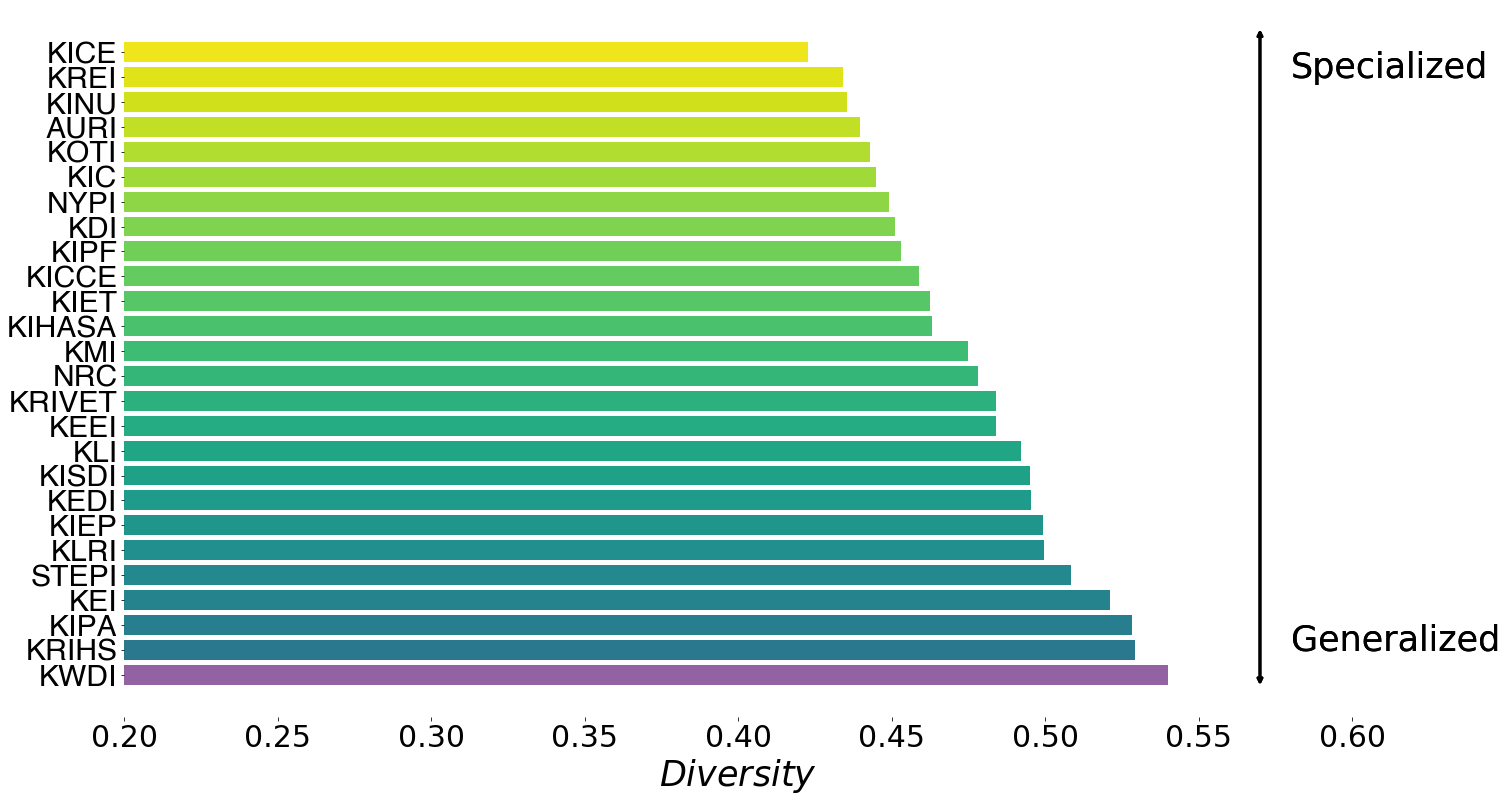

In [23]:
#visualization of diversity
fontprop=fm.FontProperties(fname="/home/balla/yeoncham/data/Helvetica 400.ttf",size=19)

plt.rcParams["figure.figsize"] = (22,13)
# #dispersions.reverse()
# c_lst=[plt.cm.BrBG(0)]
c_lst=[plt.cm.PRGn(0.18)]
c_lst += [plt.cm.viridis(a) for a in np.linspace(0.4, 1, len(dispersions)-1)]
names = [x[0] for x in dispersions]
xs = [x[1] for x in dispersions]
plt.barh(range(len(xs)-1), xs[:-1], color=c_lst)
plt.xlim([0.2, 0.6])
plt.xlabel(r'$Diversity$', fontsize=35)
plt.yticks(range(len(xs)), names)
from matplotlib.pyplot import gca
ax = gca()
ax.set_yticks(range(len(xs)-1))
ax.set_yticklabels(names[:-1], fontproperties=fontprop)
plt.annotate(s='', xy=(0.57,-0.5), xytext=(0.57,26), arrowprops=dict(arrowstyle='<->', lw='3'))
plt.text(0.58,24,'Specialized', fontsize=35)
plt.text(0.58,1,'Generalized', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()



# Difference of Diversity across time series

In [28]:
year=[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
list_by_year=[]
for i, name in enumerate(unique_affiliation_classified):#각 기관마다
    index_list = index_by_affiliation[name][0]

    list_paper_by_year=[]
    for y in year:
        list_paper_year_inst=[]#y 년도에 쓴 논문
        for k in index_list:
            if data.loc[k]['출판년도'] == y:
                list_paper_year_inst.append(k)
        list_paper_by_year.append(list_paper_year_inst)
    list_by_year.append(list_paper_by_year)
print(len(list_by_year))
print(len(list_by_year[0])) # first aff
print(len(list_by_year[0][0])) #1번째 기관, 첫해 논문 리스트

27
19
28


In [41]:
#mean_vector=[]
diff_diversity_inst={}
for i, name in enumerate(unique_affiliation_classified):
    #i번째 기관의 년도에 따른 meanvector 리스트
    if len(list_by_year[i][18])==0:
        continue
    elif len(list_by_year[i][0])==0:
        continue
        
    vecs1 = np.array(emb_vectors[list_by_year[i][18]])
    mean_cordinate1 = np.mean(vecs1,axis=0)
    coisne_distances1 = [distance.cosine(vec, mean_cordinate1) for vec in vecs1]
    
    vecs2 = np.array(emb_vectors[list_by_year[i][0]])
    mean_cordinate2 = np.mean(vecs2,axis=0)
    coisne_distances2 = [distance.cosine(vec, mean_cordinate2) for vec in vecs2]
    diff_diversity_inst.update({unique_affiliation_classified_eng_abb[unique_affiliation_classified.index(name)]: np.mean(coisne_distances1)-np.mean(coisne_distances2)})
    #print(len(mean_inst))

In [42]:
def f(x):
    return x[1]
diff_diversity_inst = sorted(diff_diversity_inst.items(),key=f)
print("Institution and difference of diversity is")
print(diff_diversity_inst,"\n")
print("The number of institution that publishes reports every year is ",len(diff_diversity_inst))

Institution and difference of diversity is
[('KIPA', -0.08232016414403914), ('KRIVET', -0.08183482528355207), ('KRIHS', -0.07735332841039605), ('KEDI', -0.062219589406793785), ('KLI', -0.03996418653564021), ('KMI', -0.016499243905279792), ('KDI', -0.007623093813023674), ('KIEP', -0.0034802319994871045), ('KISDI', -0.0017442055619679708), ('KREI', 0.0022764991436685644), ('NYPI', 0.0023165869893449487), ('KIET', 0.012426792277547782), ('KIC', 0.026387916718210502), ('STEPI', 0.036318279802799225), ('KICE', 0.07111586742277998), ('KINU', 0.07945272475481036), ('KIHASA', 0.08286772682159038), ('KEEI', 0.08648707866668703), ('KLRI', 0.09323912285841429), ('KOTI', 0.098779505713467), ('KIPF', 0.11063384102738422), ('KEI', 0.12452042601169278), ('KWDI', 0.21866343606982308)] 

The number of institution that publishes reports every year is  23


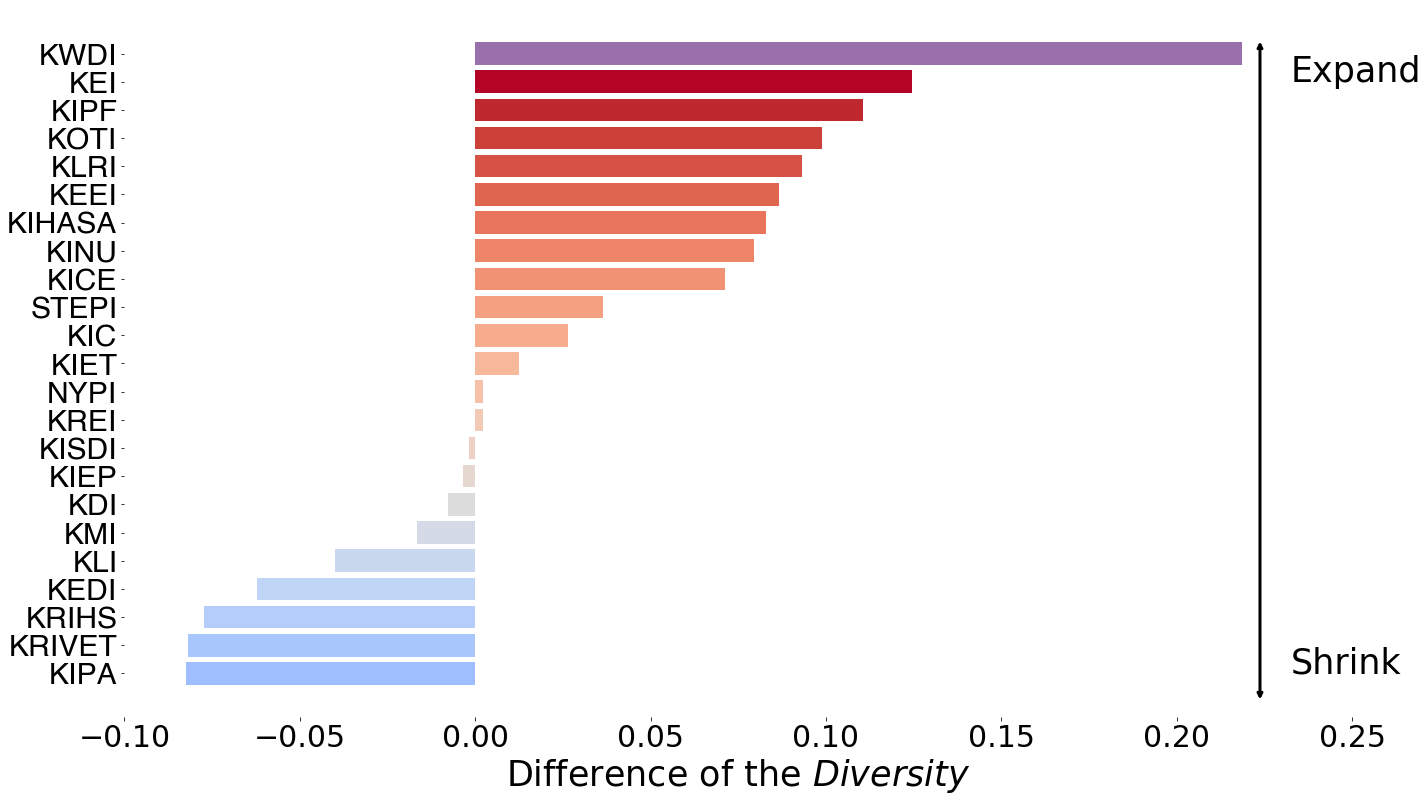

In [44]:
#visualization of diversity
from matplotlib.ticker import StrMethodFormatter
import pandas as pd
plt.rcParams["figure.figsize"] = (22,13)
#dispersions.reverse()
c_lst =[plt.cm.coolwarm(a) for a in np.linspace(0.3, 1.0, len(diff_diversity_inst)-1)]
#c_lst+=[plt.cm.BrBG(0)]
c_lst+=[plt.cm.PRGn(0.2)]

names = [x[0] for x in diff_diversity_inst]
xs = [x[1] for x in diff_diversity_inst]
plt.barh(range(len(xs)), xs, color=c_lst)
plt.xlim([-0.1, 0.25])
plt.xlabel('Difference of the 'r'$Diversity$', fontsize=35)
plt.yticks(range(len(xs)), names)
from matplotlib.pyplot import gca
ax = gca()
ax.set_yticks(range(len(xs)))
ax.set_yticklabels(names, fontproperties=fontprop)
plt.annotate(s='', xy=(0.22375,-1), xytext=(0.22375,22.5), arrowprops=dict(arrowstyle='<->',lw='3'))
plt.text(0.2325,21,'Expand', fontsize=35)
plt.text(0.2325,0,'Shrink', fontsize=35)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.show()



# KWDI_temporal

In [45]:
kwdi_div=[]
for i, name in enumerate(unique_affiliation_classified):
    if name=='한국여성정책연구원':
        for k in range(19):
            vecs1 = np.array(emb_vectors[list_by_year[i][k]])
            mean_cordinate1 = np.mean(vecs1,axis=0)
            kwdi_div.append(np.mean([distance.cosine(vec, mean_cordinate1) for vec in vecs1]))

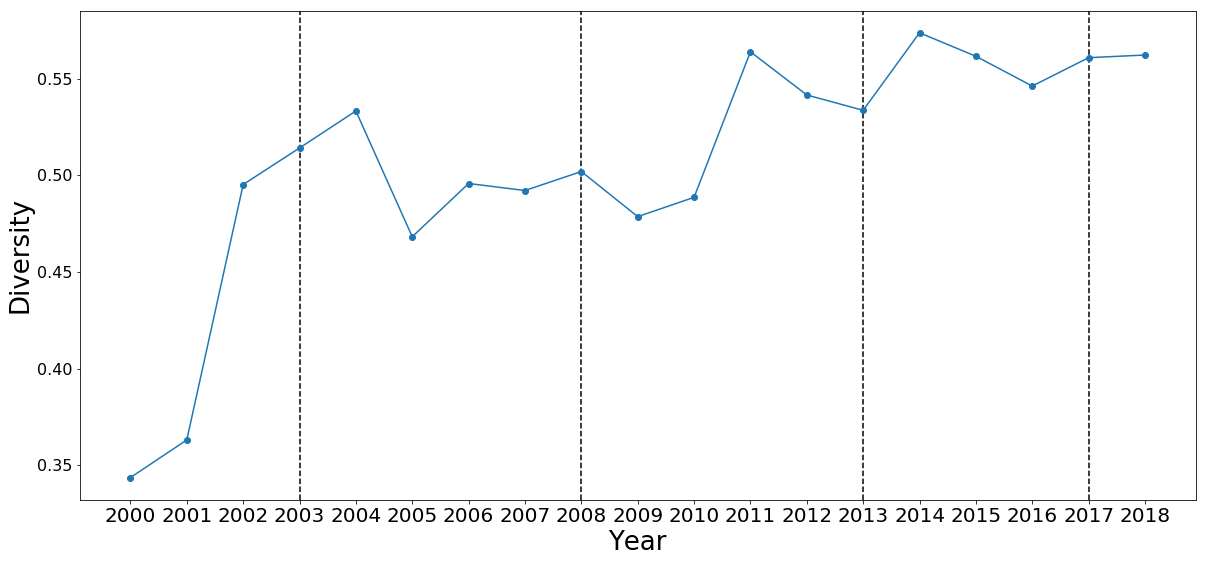

In [47]:
fig = plt.figure(figsize=(20,9))


c_lst = [plt.cm.rainbow(a) for a in np.linspace(0.0, 1.0, 5)]
year_np=np.array(year)
plt.axvline(x=2003, ymin=0, ymax=1,linestyle='--',color='black')
plt.axvline(x=2008, ymin=0, ymax=1,linestyle='--',color='black')
plt.axvline(x=2013, ymin=0, ymax=1,linestyle='--',color='black')
plt.axvline(x=2017, ymin=0, ymax=1,linestyle='--',color='black')
plt.xticks(year,fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel('Year',fontsize=26)
plt.ylabel('Diversity',fontsize=26)
plt.plot(year_np,kwdi_div,marker='o')
plt.show()